# 4d. Daten beschaffen

In diesem Notebook setzen wir die Datenbeschaffung fort, indem wir eine Auswahl aus der strukturieren Tabelle von Märchen-Volltexten treffen.

## Inhalte
- Wir laden die zuvor erzeugte TSV-Datei
- Wir untersuchen die Tabelle nach Autor*innen
- Wir treffen eine Auswahl: Brüder Grimm und 1857
- Wir selektieren nur Märchen der Brüder Grimm aus dem Jahr 1857
- Wir speichern die Tabelle für den nächsten Schritt


In [1]:
import pathlib
import time

import pandas as pd
from slugify import slugify

DATA_DIR = pathlib.Path().cwd().parent.joinpath("data")
PROC_DATA_DIR = DATA_DIR.joinpath("processed")

In [2]:
filename = PROC_DATA_DIR.joinpath("wikisource_fairytale_fulltext.tsv")
fairytales = pd.read_csv(filename, sep="\t")
# set date column to integer64 type, allowing missing values
fairytales["date"] = fairytales["date"].astype("Int64")
fairytales.head()

,url,title,creator,date,place,edition,publisher,source,text
0,https://de.wikisource.org/wiki/Des_Perlenfisch...,Des Perlenfischers Töchterlein,NaN,1845,München,NaN,Braun & Schneider,"Fliegende Blätter, Band 1, Nr. 12, S. 89–92 un...","In Bayern ist ein Ländlein, heißt die Steinpfa..."
1,"https://de.wikisource.org/wiki/Bittet,_so_wird...","Bittet, so wird Euch gegeben!",NaN,1930,Danzig,NaN,Fuchs & Cie.,"Aus dem Märchenschatz der Kaschubei, S. 43–46","Es war einmal ein hochbetagter Mann, der war s..."
2,https://de.wikisource.org/wiki/Der_Soldat_und_...,Der Soldat und der Teufel,NaN,1930,Danzig,NaN,Fuchs & Cie.,"Aus dem Märchenschatz der Kaschubei, S. 25–26",Einmal stand ein Soldat auf Posten. Es war im ...
3,https://de.wikisource.org/wiki/Der_gute_Zeuge,Der gute Zeuge,NaN,1930,Danzig,NaN,Fuchs & Cie.,"Aus dem Märchenschatz der Kaschubei, S. 37–39",Ein junger Mensch ging auf Wanderschaft. Als e...
4,https://de.wikisource.org/wiki/Der_gute_und_de...,Der gute und der böse Bruder,NaN,1930,Danzig,NaN,Fuchs & Cie.,"Aus dem Märchenschatz der Kaschubei, S. 31–35","Es waren einmal zwei Brüder, die wollten in di..."


In [3]:
# number of distinct creators
len(fairytales["creator"].unique())

54

In [4]:
# counts of fairytales per creator, top 10
fairytales["creator"].value_counts().head(10)

Brüder Grimm                     1318
Heinrich Pröhle                   146
Ernst Meier                        90
unbekannt                          78
Wilhelm Busch                      42
Johann Wilhelm Wolf                39
Johann Andreas Christian Löhr      37
Johann Heinrich Lehnert            29
Fridrich Pfaff                     17
Friedrich Lorentz                  15
Name: creator, dtype: int64

In [5]:
# select rows by value in creator column
wanted_creator = "Brüder Grimm"

In [6]:
filtered_fairytales = fairytales[fairytales["creator"] == wanted_creator]
filtered_fairytales.head()

,url,title,creator,date,place,edition,publisher,source,text
29,https://de.wikisource.org/wiki/Allerlei-Rauh_(...,Allerlei-Rauh,Brüder Grimm,1812,Berlin,1. Auflage,Realschulbuchhandlung,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...","Es war einmal ein König, der hatte eine Frau, ..."
30,https://de.wikisource.org/wiki/Aschenputtel_(1...,Aschenputtel,Brüder Grimm,1812,Berlin,1. Auflage,Realschulbuchhandlung,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...","Es war einmal ein reicher Mann, der lebte lang..."
31,https://de.wikisource.org/wiki/Blaubart_(1812),Blaubart,Brüder Grimm,1812,Berlin,1. Auflage,Realschulbuchhandlung,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...","In einem Walde lebte ein Mann, der hatte drei ..."
32,https://de.wikisource.org/wiki/Br%C3%BCderchen...,Brüderchen und Schwesterchen,Brüder Grimm,1812,Berlin,1. Auflage,Realschulbuchhandlung,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...",Brüderchen nahm sein Schwesterchen an der Hand...
33,https://de.wikisource.org/wiki/Das_Birnli_will...,Das Birnli will nit fallen,Brüder Grimm,1812,Berlin,1. Auflage,Realschulbuchhandlung,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...","Der Herr will das Birnli schüttle,\ndas Birnli..."


In [7]:
filtered_fairytales["date"].unique()

<IntegerArray>
[1812, 1815, 1819, 1837, 1840, 1843, 1850, 1856, 1857]
Length: 9, dtype: Int64

In [8]:
filtered_fairytales["edition"].unique()

array(['1. Auflage', '2. Auflage', '3. Auflage', '4. Auflage',
       'Fünfte, stark vermehrte und verbesserte Auflage',
       'Sechste vermehrte und verbesserte Auflage', '6. Auflage',
       '7. Auflage (Ausgabe letzter Hand)',
       '7. Auflage(Ausgabe letzter Hand)'], dtype=object)

In [9]:
# counts of fairytales per date
filtered_fairytales["date"].value_counts()

1857    210
1850    209
1843    202
1840    186
1837    176
1819    169
1812     90
1815     70
1856      6
Name: date, dtype: Int64

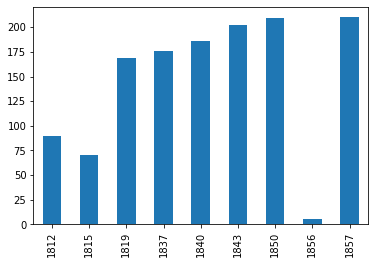

In [10]:
filtered_fairytales["date"].value_counts().sort_index().plot(kind="bar");

In [11]:
# select rows by value in date column
wanted_year = 1857

filtered_fairytales = filtered_fairytales[filtered_fairytales["date"] == wanted_year]
filtered_fairytales.head()

,url,title,creator,date,place,edition,publisher,source,text
1137,https://de.wikisource.org/wiki/Allerleirauh_(1...,Allerleirauh,Brüder Grimm,1857,Göttingen,7. Auflage (Ausgabe letzter Hand),Dieterich,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...","Es war einmal ein König, der hatte eine Frau m..."
1138,https://de.wikisource.org/wiki/Armuth_und_Demu...,Armuth und Demuth führen zum Himmel,Brüder Grimm,1857,Göttingen,7. Auflage (Ausgabe letzter Hand),Dieterich,"Kinder- und Haus-Märchen Band 2, Große Ausgabe...","Es war einmal ein Königssohn, der gieng hinaus..."
1139,https://de.wikisource.org/wiki/Aschenputtel_(1...,Aschenbuttel,Brüder Grimm,1857,Göttingen,7. Auflage (Ausgabe letzter Hand),Dieterich,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...",Einem reichen Manne dem wurde seine Frau krank...
1140,https://de.wikisource.org/wiki/Bruder_Lustig_(...,Bruder Lustig,Brüder Grimm,1857,Göttingen,7. Auflage (Ausgabe letzter Hand),Dieterich,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...","Es war einmal ein großer Krieg, und als der Kr..."
1141,https://de.wikisource.org/wiki/Br%C3%BCderchen...,Brüderchen und Schwesterchen,Brüder Grimm,1857,Göttingen,7. Auflage (Ausgabe letzter Hand),Dieterich,"Kinder- und Haus-Märchen Band 1, Große Ausgabe...",Brüderchen nahm sein Schwesterchen an der Hand...


In [12]:
wanted_year

1857

In [13]:
wanted_creator

'Brüder Grimm'

In [14]:
slugify(wanted_creator)

'bruder-grimm'

In [15]:
filename = PROC_DATA_DIR.joinpath(f"fairytales_{slugify(wanted_creator)}_{wanted_year}.tsv")
filtered_fairytales.to_csv(filename, sep="\t", index=False)

In [16]:
import session_info

session_info.show()